# Gender and Race Callback Predictor

## Introduction
...

## Data Collection and Preprocessing
...


In [26]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

sns.set()

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data
df = pd.read_csv('resume.csv')

In [3]:
# Show first 5 rows
df.head()

,job_ad_id,job_city,job_industry,job_type,job_fed_contractor,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,...,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,resume_quality
0,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,0,0,0,1,0,low
1,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,1,1,0,1,high
2,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,0,0,0,0,low
3,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,1,1,0,1,1,high
4,385,Chicago,other_service,secretary,0.0,1,nonprofit,1,0,0,...,0,1,22,1,0,0,0,0,1,high


In [4]:
# Show information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_ad_id               4870 non-null   int64  
 1   job_city                4870 non-null   object 
 2   job_industry            4870 non-null   object 
 3   job_type                4870 non-null   object 
 4   job_fed_contractor      3102 non-null   float64
 5   job_equal_opp_employer  4870 non-null   int64  
 6   job_ownership           4870 non-null   object 
 7   job_req_any             4870 non-null   int64  
 8   job_req_communication   4870 non-null   int64  
 9   job_req_education       4870 non-null   int64  
 10  job_req_min_experience  2124 non-null   object 
 11  job_req_computer        4870 non-null   int64  
 12  job_req_organization    4870 non-null   int64  
 13  job_req_school          4870 non-null   object 
 14  received_callback       4870 non-null   

## Exploratory Data Analysis
...


In [5]:
# Perform descriptive statistics on the data
df.describe()

,job_ad_id,job_fed_contractor,job_equal_opp_employer,job_req_any,job_req_communication,job_req_education,job_req_computer,job_req_organization,received_callback,years_college,college_degree,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address
count,4870.000000,3102.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,651.777823,0.114765,0.291170,0.787269,0.124846,0.106776,0.437166,0.072690,0.080493,3.618480,0.719507,0.052772,0.559548,7.842916,0.820534,0.328747,0.411499,0.097125,0.448049,0.479261
std,388.690698,0.318789,0.454349,0.409281,0.330578,0.308860,0.496087,0.259654,0.272083,0.714997,0.449286,0.223601,0.496492,5.044612,0.383782,0.469806,0.492156,0.296159,0.497345,0.499621
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,306.250000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,647.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,979.750000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,9.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1344.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,44.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Value counts for categorical columns
print(df['race'].value_counts())
print(df['gender'].value_counts())

white    2435
black    2435
Name: race, dtype: int64
f    3746
m    1124
Name: gender, dtype: int64


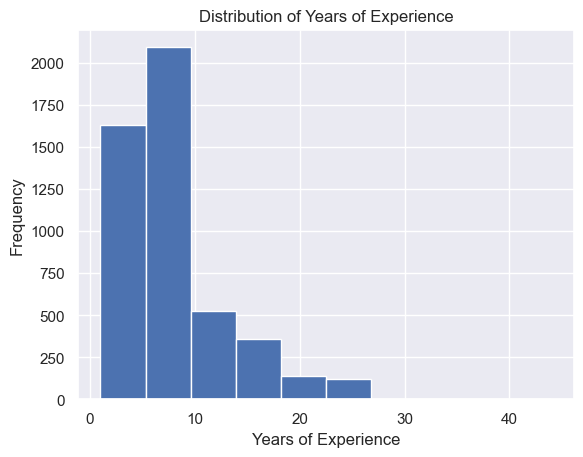

In [7]:
# Histogram of years of experience
plt.hist(df['years_experience'], bins=10)
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.title('Distribution of Years of Experience')
plt.show()

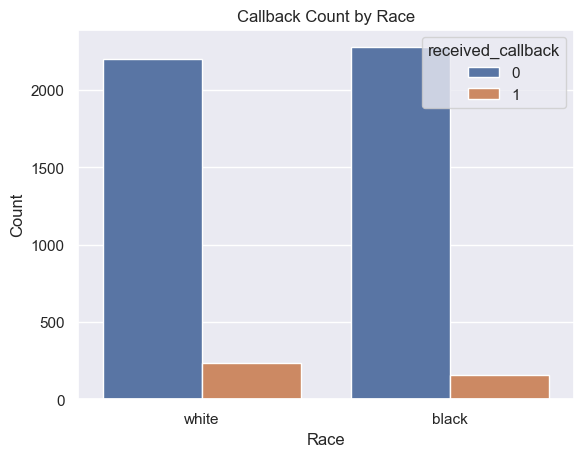

In [8]:
# Analyze the relationship between race and callbacks
sns.countplot(data=df, x='race', hue='received_callback')
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Callback Count by Race')
plt.show()

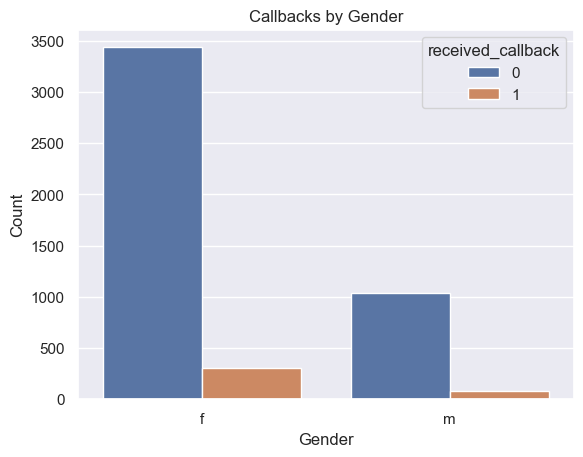

In [9]:
# Analyze the relationship between gender and callbacks
sns.countplot(data=df, x='gender', hue='received_callback')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Callbacks by Gender')
plt.show()

## Feature Engineering
...


In [10]:
# List of irrelevant columns
irrelevant_columns = ['job_ad_id', 'job_city', 'job_industry', 'job_type', 'job_fed_contractor',
                      'job_equal_opp_employer', 'job_ownership', 'job_req_any', 'job_req_communication',
                      'job_req_education', 'job_req_min_experience', 'job_req_computer', 'job_req_organization',
                      'job_req_school', 'firstname', 'years_college', 'college_degree', 'honors',
                      'worked_during_school', 'computer_skills', 'special_skills', 'volunteer']

# Remove irrelevant columns from df
df = df.drop(irrelevant_columns, axis=1)

In [11]:
# Show first 5 rows
df.head()

,received_callback,race,gender,years_experience,military,employment_holes,has_email_address,resume_quality
0,0,white,f,6,0,1,0,low
1,0,white,f,6,1,0,1,high
2,0,black,f,6,0,0,0,low
3,0,black,f,6,0,1,1,high
4,0,white,f,22,0,0,1,high


In [12]:
# Show unique values in each column
for column in df.columns:
    print(column, df[column].unique())

received_callback [0 1]
race ['white' 'black']
gender ['f' 'm']
years_experience [ 6 22  5 21  3  8  4  2  7  9 13 19 12 11 10 23  1 14 18 26 15 25 16 20
 17 44]
military [0 1]
employment_holes [1 0]
has_email_address [0 1]
resume_quality ['low' 'high']


In [13]:
# Perform label encoding for categorical variables
label_encoder = LabelEncoder()
df['race_encoded'] = label_encoder.fit_transform(df['race'])
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])
df['resume_quality_encoded'] = label_encoder.fit_transform(df['resume_quality'])

# Drop the original categorical variables
df_encoded = df.drop(['race', 'gender', 'resume_quality'], axis=1)

In [14]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the column(s) to normalize
numerical_cols = ['years_experience']

# Apply Min-Max normalization to the selected column(s)
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


In [15]:
df.head()

,received_callback,race,gender,years_experience,military,employment_holes,has_email_address,resume_quality,race_encoded,gender_encoded,resume_quality_encoded
0,0,white,f,6,0,1,0,low,1,0,1
1,0,white,f,6,1,0,1,high,1,0,0
2,0,black,f,6,0,0,0,low,0,0,1
3,0,black,f,6,0,1,1,high,0,0,0
4,0,white,f,22,0,0,1,high,1,0,0


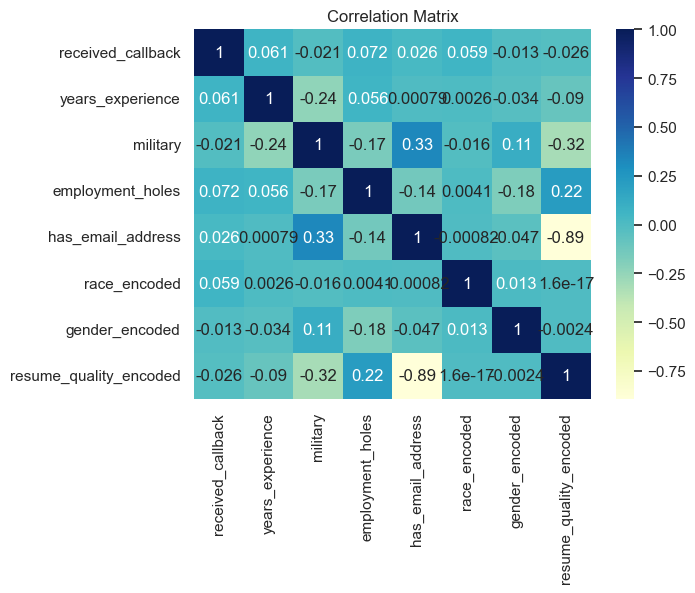

In [16]:
# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

## Model Selection
...

In [17]:
# Separate the features (X) and the target variable (y)
X = df_encoded.drop('received_callback', axis=1)
y = df_encoded['received_callback']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Show the shape of the training and test sets
print(X_train.shape)
print(X_test.shape)

(3896, 7)
(974, 7)


In [19]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [27]:
# Predict the test set results
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

## Model Training and Evaluation
...

In [28]:
# Calculate classification evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

In [29]:
# Calculate regression evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [30]:
# Print the evaluation metrics
print("Classification Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)

print("\nRegression Metrics:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

Classification Metrics:
Accuracy: 0.9342915811088296
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC AUC: 0.5604395604395604

Regression Metrics:
MAE: 0.06570841889117043
MSE: 0.06570841889117043
RMSE: 0.2563365344448006


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate classification evaluation metrics
classification_metrics = classification_report(y_test, y_pred)
print(classification_metrics)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       910
           1       0.00      0.00      0.00        64

    accuracy                           0.93       974
   macro avg       0.47      0.50      0.48       974
weighted avg       0.87      0.93      0.90       974

